<a href="https://colab.research.google.com/github/komaltp/project/blob/main/Komal_Patil_Prover_juice_papain_2013_Tara_KMITL_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.preprocessing import scale
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from numpy import sqrt 
from sklearn.svm import SVR
import statistics

In [ ]:
df=pd.read_csv("/content/Prover_juice_papain_2013_Tara (2).csv")

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 501,Unnamed: 502,Unnamed: 503,Unnamed: 504,Unnamed: 505,Unnamed: 506,Unnamed: 507,Unnamed: 508,Unnamed: 509,Unnamed: 510
0,Sample,Rupture force,Distance at rup,Average firmnes,Toughness,Penetrating for,Penetrating ene,L,a,b,...,9888.00000,9900.00000,9912.00000,9924.00000,9936.00000,9948.00000,9960.00000,9972.00000,9984.00000,9996.00000
1,1-1AP,30.073,3.596,8.393,52.882,17.755,266.302,27.93,-7.7,13.25,...,-0.01823,-0.01774,-0.01684,-0.01520,-0.01445,-0.01340,-0.01193,-0.01097,-0.01014,-0.00956
2,1-2AP,27.357,3.52,7.892,49.93,19.336,290.025,34.27,-10.14,20.3,...,-0.01818,-0.01739,-0.01610,-0.01471,-0.01449,-0.01418,-0.01276,-0.01143,-0.01030,-0.00937
3,2-1AP,30.534,4.243,7.287,61.572,16.461,246.897,37.74,-10.76,24.83,...,-0.01532,-0.01424,-0.01336,-0.01285,-0.01217,-0.01102,-0.00976,-0.00902,-0.00851,-0.00754
4,2-2AP,31.099,3.284,9.552,51.26,17.244,258.649,34.51,-9.18,16.21,...,-0.00589,-0.00528,-0.00415,-0.00300,-0.00251,-0.00131,0.00003,0.00101,0.00216,0.00260


In [ ]:
df=df.drop(0)

In [ ]:
df.describe()

,Wavelength (nm),Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,...,Unnamed: 501,Unnamed: 502,Unnamed: 503,Unnamed: 504,Unnamed: 505,Unnamed: 506,Unnamed: 507,Unnamed: 508,Unnamed: 509,Unnamed: 510
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,1.660889,1.666508,1.668675,1.667978,1.668853,1.673033,1.675361,1.677118,1.685765,1.694915,...,-0.017524,-0.016615,-0.015710,-0.014787,-0.013985,-0.013068,-0.012070,-0.011171,-0.010126,-0.009159
std,0.030648,0.030042,0.030318,0.030461,0.030838,0.029726,0.030101,0.030369,0.030278,0.030912,...,0.005432,0.005461,0.005538,0.005619,0.005575,0.005565,0.005641,0.005632,0.005630,0.005643
min,1.593840,1.603120,1.609760,1.600760,1.604940,1.605490,1.614490,1.617480,1.622880,1.629330,...,-0.049220,-0.048620,-0.048300,-0.047530,-0.046730,-0.046440,-0.045930,-0.044720,-0.043190,-0.042670
25%,1.638500,1.645840,1.648290,1.648120,1.649460,1.652670,1.653490,1.656050,1.662010,1.670690,...,-0.019950,-0.018790,-0.017930,-0.017160,-0.016200,-0.015250,-0.014350,-0.013280,-0.012310,-0.011390
50%,1.660840,1.662040,1.665710,1.666380,1.665890,1.669400,1.671860,1.674250,1.681480,1.692370,...,-0.017750,-0.016870,-0.015950,-0.014840,-0.013810,-0.013020,-0.012180,-0.011260,-0.010140,-0.009370
75%,1.680240,1.684390,1.688430,1.687350,1.687670,1.691420,1.691790,1.694050,1.707410,1.714210,...,-0.015470,-0.014750,-0.013830,-0.012800,-0.011930,-0.011190,-0.010350,-0.009130,-0.008390,-0.007210
max,1.790610,1.780400,1.785260,1.796670,1.786950,1.783910,1.779450,1.776220,1.796320,1.798680,...,0.009240,0.009690,0.010650,0.012140,0.012780,0.013420,0.015050,0.016220,0.017070,0.017930


In [ ]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)
df=df.fillna("0")
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 501,Unnamed: 502,Unnamed: 503,Unnamed: 504,Unnamed: 505,Unnamed: 506,Unnamed: 507,Unnamed: 508,Unnamed: 509,Unnamed: 510
1,30.073,3.596,8.393,52.882,17.755,266.302,27.93,-7.7,13.25,23.8704,...,-0.01823,-0.01774,-0.01684,-0.01520,-0.01445,-0.01340,-0.01193,-0.01097,-0.01014,-0.00956
2,27.357,3.52,7.892,49.93,19.336,290.025,34.27,-10.14,20.3,26.74918,...,-0.01818,-0.01739,-0.01610,-0.01471,-0.01449,-0.01418,-0.01276,-0.01143,-0.01030,-0.00937
3,30.534,4.243,7.287,61.572,16.461,246.897,37.74,-10.76,24.83,11.88538,...,-0.01532,-0.01424,-0.01336,-0.01285,-0.01217,-0.01102,-0.00976,-0.00902,-0.00851,-0.00754
4,31.099,3.284,9.552,51.26,17.244,258.649,34.51,-9.18,16.21,32.75927,...,-0.00589,-0.00528,-0.00415,-0.00300,-0.00251,-0.00131,0.00003,0.00101,0.00216,0.00260
5,32.656,3.413,9.625,60.907,17.322,259.822,30.58,-7.76,12.83,5.256333,...,-0.01987,-0.01879,-0.01755,-0.01644,-0.01550,-0.01463,-0.01321,-0.01232,-0.01208,-0.01161


In [ ]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       ...
       'Unnamed: 501', 'Unnamed: 502', 'Unnamed: 503', 'Unnamed: 504',
       'Unnamed: 505', 'Unnamed: 506', 'Unnamed: 507', 'Unnamed: 508',
       'Unnamed: 509', 'Unnamed: 510'],
      dtype='object', length=510)

In [ ]:
df.describe()

,Wavelength (nm),Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,...,Unnamed: 501,Unnamed: 502,Unnamed: 503,Unnamed: 504,Unnamed: 505,Unnamed: 506,Unnamed: 507,Unnamed: 508,Unnamed: 509,Unnamed: 510
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,1.660889,1.666508,1.668675,1.667978,1.668853,1.673033,1.675361,1.677118,1.685765,1.694915,...,-0.017524,-0.016615,-0.015710,-0.014787,-0.013985,-0.013068,-0.012070,-0.011171,-0.010126,-0.009159
std,0.030648,0.030042,0.030318,0.030461,0.030838,0.029726,0.030101,0.030369,0.030278,0.030912,...,0.005432,0.005461,0.005538,0.005619,0.005575,0.005565,0.005641,0.005632,0.005630,0.005643
min,1.593840,1.603120,1.609760,1.600760,1.604940,1.605490,1.614490,1.617480,1.622880,1.629330,...,-0.049220,-0.048620,-0.048300,-0.047530,-0.046730,-0.046440,-0.045930,-0.044720,-0.043190,-0.042670
25%,1.638500,1.645840,1.648290,1.648120,1.649460,1.652670,1.653490,1.656050,1.662010,1.670690,...,-0.019950,-0.018790,-0.017930,-0.017160,-0.016200,-0.015250,-0.014350,-0.013280,-0.012310,-0.011390
50%,1.660840,1.662040,1.665710,1.666380,1.665890,1.669400,1.671860,1.674250,1.681480,1.692370,...,-0.017750,-0.016870,-0.015950,-0.014840,-0.013810,-0.013020,-0.012180,-0.011260,-0.010140,-0.009370
75%,1.680240,1.684390,1.688430,1.687350,1.687670,1.691420,1.691790,1.694050,1.707410,1.714210,...,-0.015470,-0.014750,-0.013830,-0.012800,-0.011930,-0.011190,-0.010350,-0.009130,-0.008390,-0.007210
max,1.790610,1.780400,1.785260,1.796670,1.786950,1.783910,1.779450,1.776220,1.796320,1.798680,...,0.009240,0.009690,0.010650,0.012140,0.012780,0.013420,0.015050,0.016220,0.017070,0.017930


In [ ]:
df.info

<bound method DataFrame.info of     Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
1       30.073      3.596      8.393     52.882     17.755    266.302   
2       27.357       3.52      7.892      49.93     19.336    290.025   
3       30.534      4.243      7.287     61.572     16.461    246.897   
4       31.099      3.284      9.552      51.26     17.244    258.649   
5       32.656      3.413      9.625     60.907     17.322    259.822   
..         ...        ...        ...        ...        ...        ...   
153      12.77      2.754       4.63     21.011      4.313     64.689   
154      6.076      2.024      2.973      7.525      2.533     37.994   
155      30.29      2.933     10.475     45.665     18.489    277.323   
156     24.637      3.594      6.899     44.449     16.423    246.325   
157      8.314      3.849      2.146     19.574      0.831     12.467   

    Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  ...  Unnamed: 501  \
1        27.93      

# **RANDOM FOREST REGRESSOR**

# **R squared for test data**

R_Squared value for test data: 0.9599008437632361
Bias: -0.007845156250017027
Mean Squared Error: 2.1349037033195213
Root Mean Squared Error: 1.461130967202982
Mean Absolute Error: 1.2394051562499957
Ratio of performance to deviation RPD_pred: 3.0549966549727112

     Real Values  Predicted Values
0        30.713         29.940020
1        31.716         30.631545
2        25.305         26.855995
3        29.322         28.500540
4        30.402         30.019685
5        24.409         25.743575
6        31.744         29.541800
7        32.584         30.733605
8        26.420         27.942625
9        26.425         27.618085
10       31.211         28.817400
11       21.106         23.766905
12       23.291         25.237155
13       35.804         33.154620
14       26.848         28.159410
15       20.677         23.282545
16       27.539         27.744425
17       33.097         31.814980
18       27.730         28.430170
19       30.393         29.654795
20       27.774      

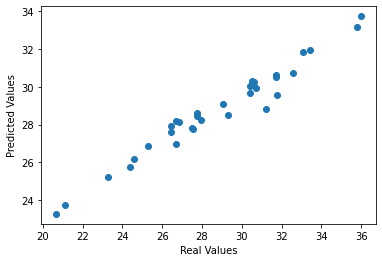

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.8701662036627359
Bias: -0.05001421874999945
Mean Squared Error: 0.17936586231640692
Root Mean Squared Error: 0.4235160709068865
Mean Absolute Error: 0.31361609374999966
Ratio of performance to deviation RPD_pred: 1.5956899944980156

     Real Values  Predicted Values
0         3.855          3.837135
1         4.672          5.069680
2         3.164          3.301935
3         3.301          3.428595
4         3.149          3.316025
5         4.392          4.102860
6         3.686          3.659655
7         2.827          3.267060
8         2.899          3.191380
9         3.183          3.990765
10        3.644          3.734125
11        3.804          3.993715
12        4.109          3.774165
13        4.232          3.878245
14        3.050          3.279285
15        2.657          3.084170
16        3.829          3.767525
17        7.280          5.842240
18        2.418          2.796040
19        3.125          3.184805
20        4.732    

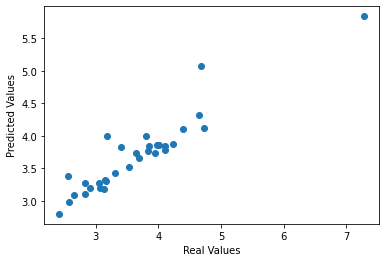

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9630098448428793
Bias: -0.04473249999999673
Mean Squared Error: 0.5978407824125059
Root Mean Squared Error: 0.7732016440829041
Mean Absolute Error: 0.5607090625000017
Ratio of performance to deviation RPD_pred: 2.3881153981008456

     Real Values  Predicted Values
0         8.062          7.976650
1         6.790          7.659700
2         8.104          8.183120
3         8.976          8.931950
4         9.791          9.490210
5         5.784          6.998125
6         8.776          8.761140
7        11.559          9.846335
8         9.179          8.719965
9         8.398          8.448755
10        8.772          8.331150
11        5.585          6.703975
12        5.865          7.172480
13        8.560          8.726610
14        8.928          9.008265
15        7.888          7.943630
16        7.182          7.513010
17        4.540          6.042990
18       11.655         10.651310
19        9.793          9.497955
20        5.964      

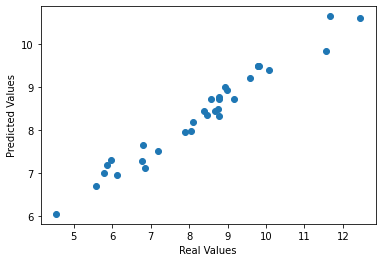

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.8797895217829017
Bias: -1.2603995312499663
Mean Squared Error: 67.37242071465411
Root Mean Squared Error: 8.208070462334867
Mean Absolute Error: 5.920477656250016
Ratio of performance to deviation RPD_pred: 1.6342363260002428

     Real Values  Predicted Values
0        59.624         59.730270
1        77.812         84.479345
2        46.451         50.600020
3        52.802         55.691290
4        50.118         52.145480
5        58.826         57.505815
6        55.728         53.145560
7        52.119         55.645420
8        43.475         49.936705
9        42.423         59.449010
10       57.812         56.526360
11       41.799         50.779505
12       43.358         45.710000
13       75.353         66.065935
14       41.417         47.065970
15       27.931         38.839805
16       58.427         55.093305
17      127.846         99.481305
18       33.660         41.830450
19       52.101         52.282310
20       72.142         6

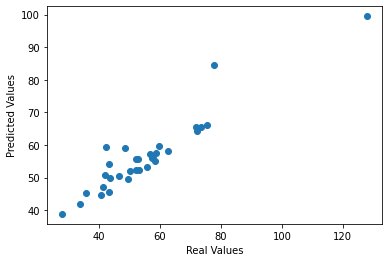

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 4"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.8000634970618983
Bias: 0.27785843750000794
Mean Squared Error: 2.9481277513953326
Root Mean Squared Error: 1.717011284585903
Mean Absolute Error: 1.0182231250000027
Ratio of performance to deviation RPD_pred: 1.7895004347084895

     Real Values  Predicted Values
0        17.649         17.874590
1        17.956         13.988040
2        15.810         16.691505
3        18.186         17.872175
4        19.164         18.587975
5        19.159         18.603670
6        17.906         16.799760
7        17.102         17.093245
8        18.271         17.670915
9        18.937         15.194205
10       19.644         18.562725
11       15.215         14.480985
12       19.417         18.427015
13       16.738         17.001045
14       17.590         17.622205
15       15.272         16.218550
16       14.784         15.940005
17        0.000          6.472115
18       18.285         17.949330
19       17.510         17.612895
20       19.194        

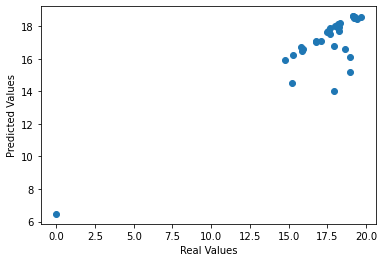

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.8020443660863075
Bias: 4.112549374999816
Mean Squared Error: 660.4438662842886
Root Mean Squared Error: 25.69910244121939
Mean Absolute Error: 15.23699125000001
Ratio of performance to deviation RPD_pred: 1.7932781077680051

     Real Values  Predicted Values
0       264.718        268.582310
1       269.317        210.442005
2       237.130        249.932230
3       272.773        269.008130
4       287.439        278.713260
5       287.364        279.134780
6       268.567        252.326915
7       256.510        256.677210
8       274.042        265.013905
9       284.030        228.011650
10      294.642        277.679390
11      228.207        217.949810
12      291.233        275.959245
13      251.052        254.963745
14      263.818        264.510875
15      229.072        243.190790
16      221.737        239.062145
17        0.000         97.025925
18      274.253        269.093625
19      262.633        264.166390
20      287.893        277.

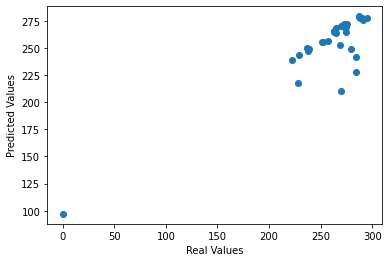

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 6"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9556044678254217
Bias: -0.09070312499999389
Mean Squared Error: 1.3407455412500076
Root Mean Squared Error: 1.1579056702728454
Mean Absolute Error: 0.9117312499999992
Ratio of performance to deviation RPD_pred: 3.295794480835915

     Real Values  Predicted Values
0         30.67          31.06475
1         29.54          29.31865
2         26.43          27.21855
3         23.02          25.47905
4         28.96          29.37355
5         28.94          30.66035
6         31.18          30.19130
7         30.79          30.62005
8         27.29          28.66515
9         30.08          30.41175
10        35.59          33.50600
11        31.18          30.74535
12        30.92          30.83925
13        31.89          31.42790
14        30.36          30.52925
15        36.04          33.68495
16        28.90          30.10730
17        22.89          25.53500
18        31.37          31.05950
19        32.32          31.55935
20        28.70       

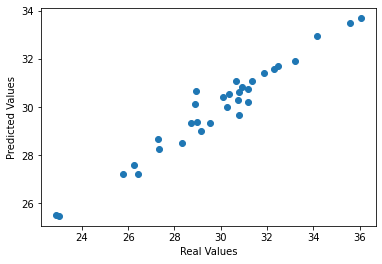

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 7"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9405217004118387
Bias: 0.017564062500000865
Mean Squared Error: 0.1184901603906251
Root Mean Squared Error: 0.34422399740666704
Mean Absolute Error: 0.2889671874999996
Ratio of performance to deviation RPD_pred: 4.160471662860364

     Real Values  Predicted Values
0         -8.83          -8.46720
1         -7.47          -7.14910
2         -6.90          -6.97325
3         -6.46          -6.79890
4         -6.68          -7.01760
5         -7.10          -7.56450
6         -7.22          -7.18500
7         -8.04          -7.77730
8         -6.76          -6.92880
9         -6.25          -6.78080
10        -9.13          -8.46795
11        -7.03          -7.09435
12        -7.95          -7.74165
13        -7.93          -7.67555
14        -6.17          -6.83130
15        -7.84          -7.79680
16        -6.96          -7.32030
17        -5.69          -6.18585
18        -8.38          -8.14700
19        -8.74          -8.24375
20        -6.87      

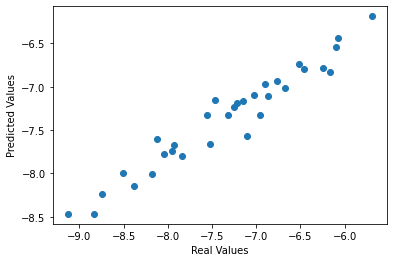

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 8"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9144845913984138
Bias: -0.173614062500004
Mean Squared Error: 1.6434380078906163
Root Mean Squared Error: 1.281966461297103
Mean Absolute Error: 1.0015765625000002
Ratio of performance to deviation RPD_pred: 3.1508668919495624

     Real Values  Predicted Values
0         15.29          14.33325
1         10.85          11.08620
2          8.30          10.97375
3          9.64          11.11680
4         10.61          11.17870
5         10.33          12.37005
6         12.02          12.16805
7         15.22          14.36605
8          9.44          10.35070
9          9.33          10.80500
10        16.65          17.54940
11        16.12          14.67975
12        11.85          12.32105
13        13.18          12.72155
14         8.64          10.33420
15        23.26          19.52725
16        12.30          12.69400
17         9.19          10.01310
18        17.01          15.47235
19        14.20          13.81000
20        11.10         

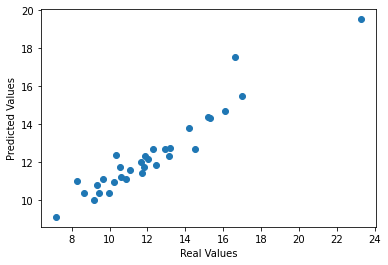

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 9"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

# **R squared for training data**

R_Squared value for test data: 0.957868313161414
Bias: 0.08685059999998757
Mean Squared Error: 2.725924860685771
Root Mean Squared Error: 1.651037510381206
Mean Absolute Error: 1.2284730799999959
Ratio of performance to deviation RPD_pred: 2.7036031520879997

      Real Values  Predicted Values
0         26.266         27.176130
1         32.497         30.228565
2         33.703         32.489910
3         29.316         28.800255
4         28.002         28.570815
..           ...               ...
120       30.647         30.119885
121       27.181         28.220475
122       27.123         26.918395
123       30.660         29.610620
124       31.082         29.871985

[125 rows x 2 columns]


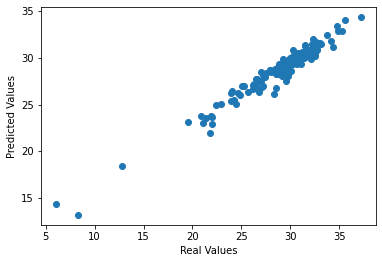

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9672838457260825
Bias: -0.0025666800000010426
Mean Squared Error: 0.047855808628599866
Root Mean Squared Error: 0.21875970522150523
Mean Absolute Error: 0.16827547999999973
Ratio of performance to deviation RPD_pred: 3.0892360006197164

      Real Values  Predicted Values
0          3.922          3.785135
1          3.330          3.448060
2          3.201          3.215425
3          3.636          3.430415
4          2.577          2.913590
..           ...               ...
120        3.824          3.693720
121        3.116          3.178880
122        3.976          3.707460
123        3.149          3.138955
124        4.322          3.920585

[125 rows x 2 columns]


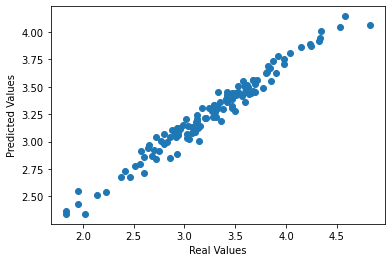

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9770535950764394
Bias: 0.009231440000002422
Mean Squared Error: 0.5168833968076009
Root Mean Squared Error: 0.7189460319158879
Mean Absolute Error: 0.556707920000003
Ratio of performance to deviation RPD_pred: 2.5683356887729523

      Real Values  Predicted Values
0          6.844          7.515865
1          9.735          9.236130
2         10.472         10.095500
3          8.105          8.465540
4         10.861         10.111050
..           ...               ...
120        8.098          8.363560
121        8.786          9.065240
122        6.988          7.770805
123        9.810          9.777595
124        7.195          7.861425

[125 rows x 2 columns]


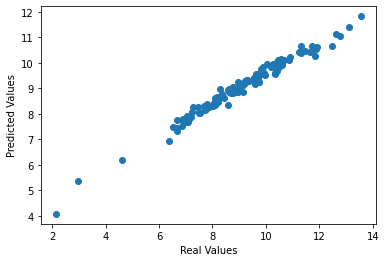

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9524520121544094
Bias: 0.11670495999999986
Mean Squared Error: 16.88669825837281
Root Mean Squared Error: 4.1093428012728275
Mean Absolute Error: 3.1539835999999957
Ratio of performance to deviation RPD_pred: 3.2642511381047155

      Real Values  Predicted Values
0         53.092         52.752190
1         58.859         56.357165
2         60.599         57.145945
3         52.417         50.740545
4         40.723         45.455925
..           ...               ...
120       62.889         58.194275
121       46.312         48.557530
122       50.509         48.392510
123       51.705         50.561530
124       60.091         56.019880

[125 rows x 2 columns]


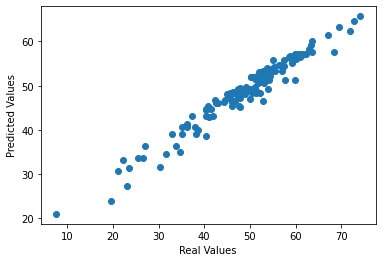

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 4"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.956815189338429
Bias: 0.05676708000001085
Mean Squared Error: 1.1616804397522067
Root Mean Squared Error: 1.0778128036687107
Mean Absolute Error: 0.7288806000000045
Ratio of performance to deviation RPD_pred: 2.8507663201877156

      Real Values  Predicted Values
0         17.801         17.503130
1         16.886         16.957575
2         19.189         18.958310
3         19.962         18.958585
4         16.222         16.760870
..           ...               ...
120       16.106         16.884450
121       19.898         19.081965
122       15.877         16.084495
123       19.176         18.585065
124       19.818         18.696770

[125 rows x 2 columns]


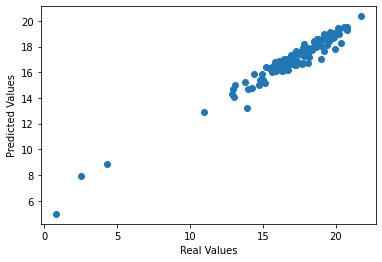

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9559162950389042
Bias: 0.9550916400000062
Mean Squared Error: 263.12635492695165
Root Mean Squared Error: 16.221169961718285
Mean Absolute Error: 10.989569239999943
Ratio of performance to deviation RPD_pred: 2.8410797683451587

      Real Values  Predicted Values
0        267.000        261.823180
1        253.273        257.360840
2        287.823        284.097490
3        299.411        284.723245
4        243.308        251.270420
..           ...               ...
120      241.570        253.013055
121      298.455        286.169140
122      238.133        240.383915
123      287.616        276.990250
124      297.244        279.366775

[125 rows x 2 columns]


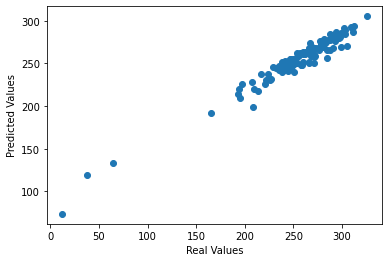

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 6"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9459252989401437
Bias: 0.017819999999993286
Mean Squared Error: 2.063391391359996
Root Mean Squared Error: 1.4364509707469992
Mean Absolute Error: 1.0947384000000013
Ratio of performance to deviation RPD_pred: 2.6566998770792027

      Real Values  Predicted Values
0          34.75          33.74035
1          29.29          29.74540
2          22.43          25.02450
3          31.67          32.22820
4          30.24          29.30950
..           ...               ...
120        35.32          32.72270
121        29.08          29.44770
122        37.84          36.03870
123        23.17          24.72625
124        28.89          29.49060

[125 rows x 2 columns]


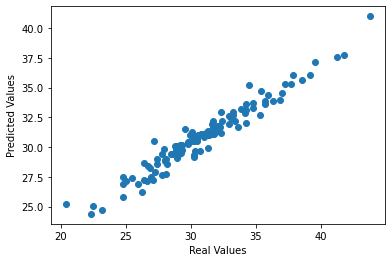

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 7"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9612374423175282
Bias: 0.002424000000001314
Mean Squared Error: 0.2632069685600003
Root Mean Squared Error: 0.5130370050590896
Mean Absolute Error: 0.3494304000000003
Ratio of performance to deviation RPD_pred: 2.791483212252906

      Real Values  Predicted Values
0          -7.92          -7.91605
1          -8.08          -7.86840
2          -6.69          -6.99880
3          -8.96          -8.71240
4          -7.31          -7.24130
..           ...               ...
120        -8.05          -7.99915
121        -7.62          -7.64275
122        -8.11          -7.72780
123        -7.86          -7.80475
124        -9.25          -8.60465

[125 rows x 2 columns]


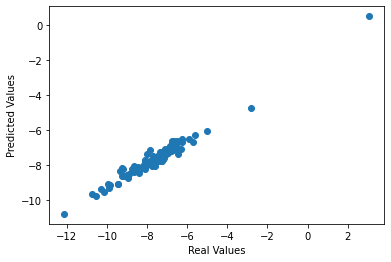

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 8"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.952349708460203
Bias: -0.050250800000000595
Mean Squared Error: 2.1536260250599977
Root Mean Squared Error: 1.4675237732520716
Mean Absolute Error: 1.0899307999999965
Ratio of performance to deviation RPD_pred: 2.752463539680569

      Real Values  Predicted Values
0          14.04          13.83495
1          13.53          12.96390
2          15.58          14.67625
3          15.54          15.75060
4          11.30          11.10740
..           ...               ...
120        13.19          12.86000
121        13.61          13.95575
122        12.98          14.14025
123        14.51          14.72515
124        14.67          13.56670

[125 rows x 2 columns]


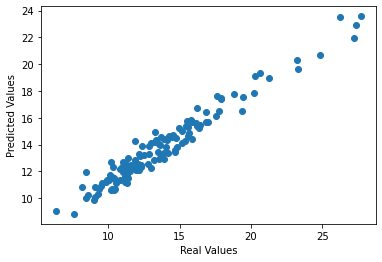

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 9"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()